In [ ]:
!pip install GDAL==$(gdal-config --version)
!pip install pyproj geopandas
%pip install segment-geospatial
!pip install torch torchvision datasets
from IPython import display
display.clear_output()
print("package installed")

package installed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I. Load Geotiff data, create segmentation and visualize them

In [ ]:
import os
import torch
from samgeo import SamGeo, tms_to_geotiff
from osgeo import gdal
import matplotlib.pyplot as plt

In [ ]:
bbox = [-73.990573, 40.754296, -73.988573, 40.7556]
image = 'satellite.tif'
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source='Satellite',overwrite=True)

out_dir = './'
checkpoint = os.path.join(out_dir, 'sam_vit_h_4b8939.pth')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam = SamGeo(
    checkpoint=checkpoint,
    model_type='vit_h',
    device=device,
    erosion_kernel=(3, 3),
    mask_multiplier=255,
    sam_kwargs=None,
)


Downloaded image 01/42
Downloaded image 02/42
Downloaded image 03/42
Downloaded image 04/42
Downloaded image 05/42
Downloaded image 06/42
Downloaded image 07/42
Downloaded image 08/42
Downloaded image 09/42
Downloaded image 10/42
Downloaded image 11/42
Downloaded image 12/42
Downloaded image 13/42
Downloaded image 14/42
Downloaded image 15/42
Downloaded image 16/42
Downloaded image 17/42
Downloaded image 18/42
Downloaded image 19/42
Downloaded image 20/42
Downloaded image 21/42
Downloaded image 22/42
Downloaded image 23/42
Downloaded image 24/42
Downloaded image 25/42
Downloaded image 26/42
Downloaded image 27/42
Downloaded image 28/42
Downloaded image 29/42
Downloaded image 30/42
Downloaded image 31/42
Downloaded image 32/42
Downloaded image 33/42
Downloaded image 34/42
Downloaded image 35/42
Downloaded image 36/42
Downloaded image 37/42
Downloaded image 38/42
Downloaded image 39/42
Downloaded image 40/42
Downloaded image 41/42
Downloaded image 42/42
Saving GeoTIFF. Please wait...
Ima

In [ ]:
mask = 'segment.tif'
sam.generate(image, mask)

vector = 'segment.gpkg'
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

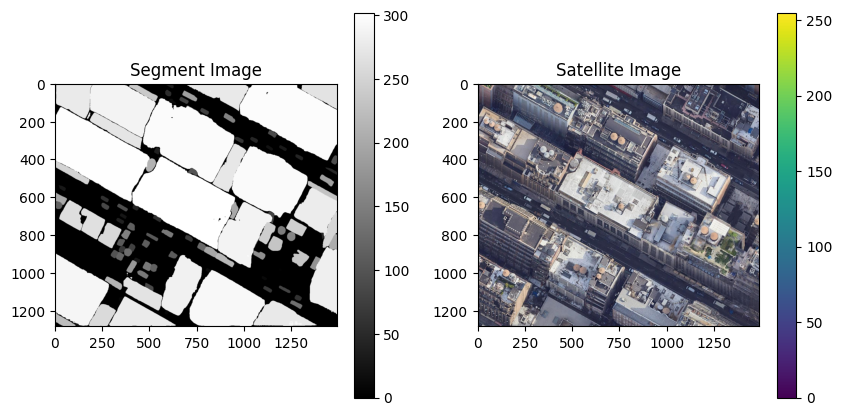

In [ ]:
# Define the paths to the GeoTIFF images
segment_tif_path = 'segment.tif'
satellite_tif_path = 'satellite.tif'

# Open the segment GeoTIFF image
segment_ds = gdal.Open(segment_tif_path)
segment_img = segment_ds.ReadAsArray()

# Open the satellite GeoTIFF image
satellite_ds = gdal.Open(satellite_tif_path)
satellite_img = satellite_ds.ReadAsArray()

# Plot the segment image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segment_img, cmap='gray')
plt.title('Segment Image')
plt.colorbar()

# Plot the satellite image
plt.subplot(1, 2, 2)
plt.imshow(satellite_img.transpose(1, 2, 0))
plt.title('Satellite Image')
plt.colorbar()

plt.show()


II. Load sidewalk Training data and visualize it

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/sidewalks'
os.chdir(path) # set current working directory

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("back2classroom/sidewalks", streaming=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
train_data = dataset['train']
val_data = dataset['val']

In [ ]:
# Get the first data entry from the train split
first_record = next(iter(dataset['train']))
print(first_record)

# Access specific features of the first record
filename = first_record['filename']
tif_data = first_record['tif']
tfw_data = first_record['tfw']

# Print the specific features
print("Filename:", filename)
# Print other features as needed
print("TIF:", tif_data)


{'filename': '1001_10_1', 'tif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4

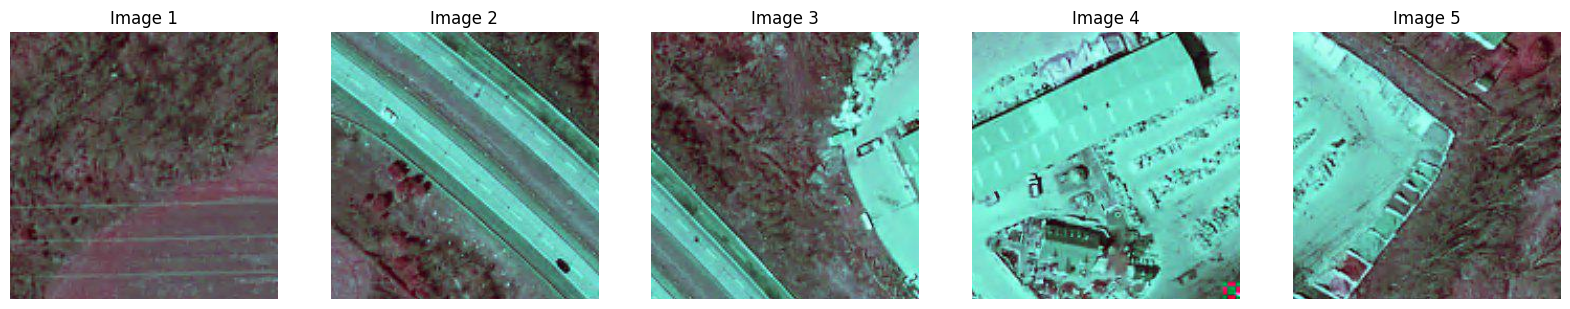

In [ ]:
import io
from PIL import Image
import matplotlib.pyplot as plt

def plot_first_n_tiff_images(dataset_stream, n=5):
    fig, axes = plt.subplots(1, n, figsize=(20, 4))
    for i, data in enumerate(dataset_stream):
        if i >= n:
            break

        image_stream = io.BytesIO(data['tif'])
        image = Image.open(image_stream)
        axes[i].imshow(image)
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')
    plt.show()


plot_first_n_tiff_images(dataset['train'])
